# Exercise 3 - Spacial Filtering

### Index No. : 190696U
### Name : Wijegunawardana C.H.W.

1. Compare the effects of 9×9 average (box) filtering and Gaussian filtering with a 9×9
kernel and σ = 4. Use the butterfly image shown in Fig. 1.

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

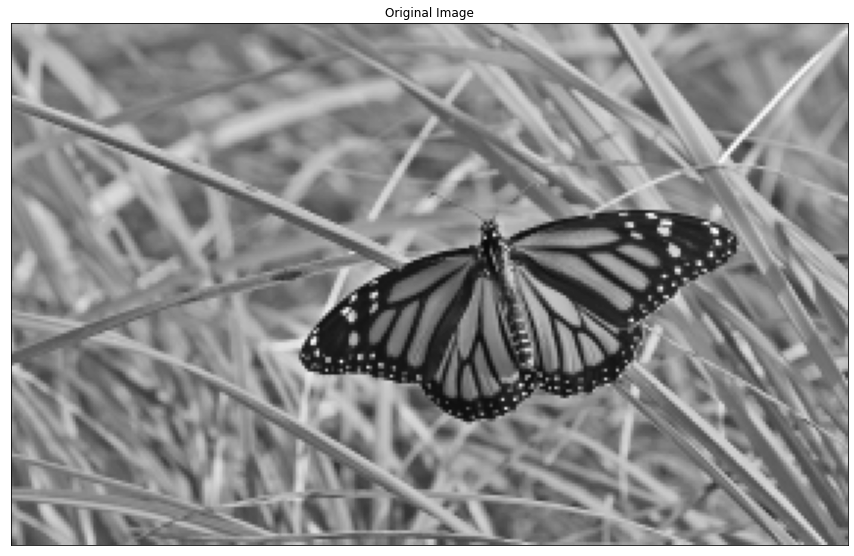

In [31]:
# Importing the image
img = cv.imread('Images/butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None

# Plot original image
fig,ax = plt.subplots(figsize = (15,15))
ax.imshow(img, cmap = 'gray',vmin=0, vmax=255)
ax.set_xticks([]), ax.set_yticks([])
plt.title("Original Image")
plt.show()

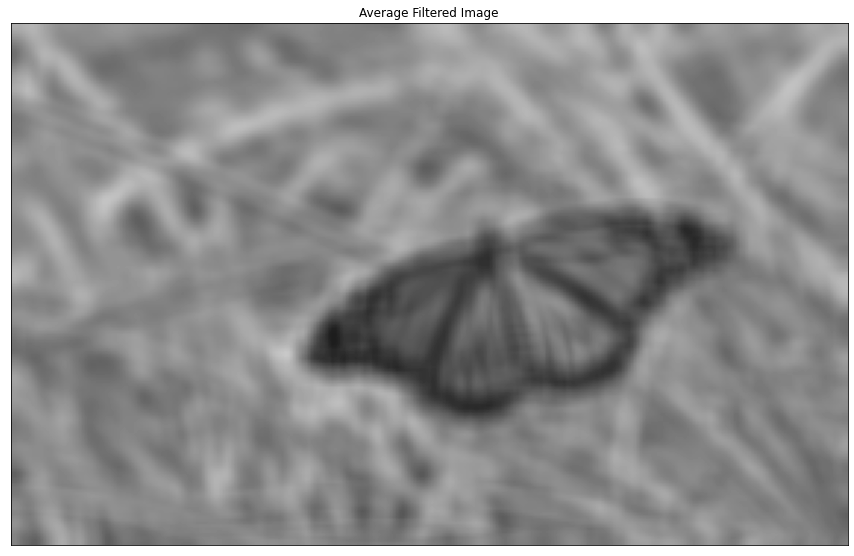

In [32]:
# Generating a 9x9 averaging kernel
box_kernel = np.ones((9,9),np.float32)/81
img_avg = cv.filter2D(img,-1,box_kernel)

# Plotting in Matplotlib
fig,ax = plt.subplots(figsize = (15,15))
ax.imshow(img_avg, cmap = 'gray',vmin=0, vmax=255)
ax.set_xticks([]), ax.set_yticks([])
plt.title("Average Filtered Image")
plt.show()

# Plotting in openCV Windows
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img_avg)
cv.waitKey(0)
cv.destroyAllWindows()

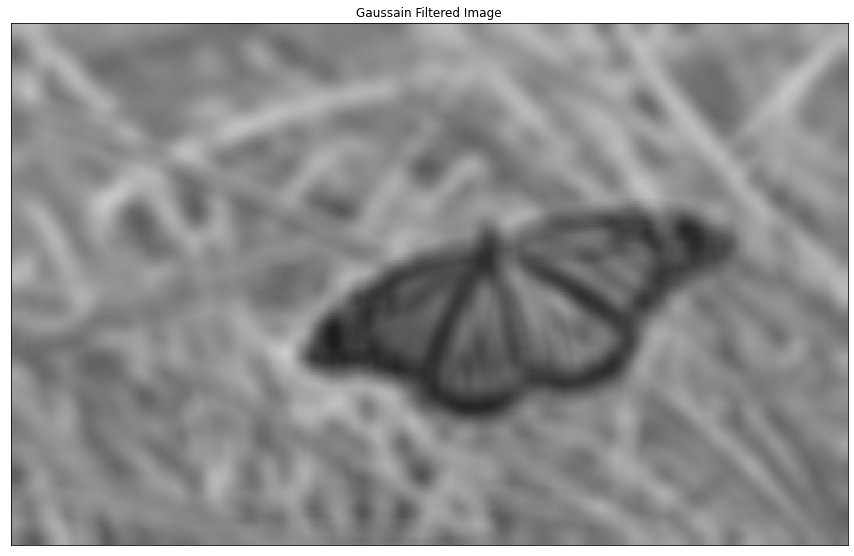

In [33]:
img_gau = cv.GaussianBlur(img,(9,9),4)

# Plotting in Matplotlib
fig,ax = plt.subplots(figsize = (15,15))
ax.imshow(img_gau, cmap = 'gray', vmin=0, vmax=255)
ax.set_xticks([]), ax.set_yticks([])
plt.title("Gaussain Filtered Image")
plt.show()

# Plotting in openCV Windows
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img_gau)
cv.waitKey(0)
cv.destroyAllWindows()

### Comparison

The two output images after applying a 9x9 averaging box filter and gaussian filtering with standard deviation of 4 are very similar to each other. The gaussian filtered output is smoother. The box filtered image has a rectangular nature in the image.

2. Create a Gaussian kernel x, y ∈ [−5,5] with σ = 1 and show as a surface plot. Use a
spatial resolution of 0.1.

(-1.999999999986112, 1.0)

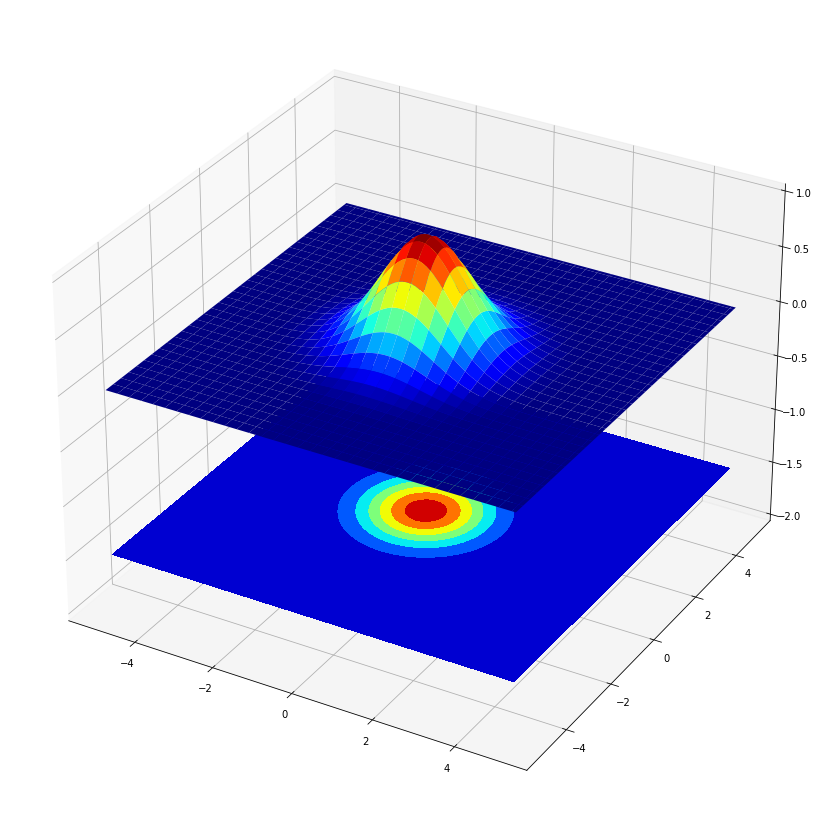

In [44]:
sigma = 1
step = 0.1

X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)
XX,YY = np.meshgrid(X, Y)
Z = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')

surf = ax.plot_surface(XX,YY,Z,cmap=cm.jet,linewidth=0,antialiased=True)
cset = ax.contourf(XX, YY, Z, zdir = 'z', offset = np.min(Z) - 1.5, cmap = cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))

3. Consider the image shown in Fig. 2.

(a) Compute and show the x and y gradients of the contact lens image. Use the
Sobel kernels.

(b) Show the gradient magnitude image.

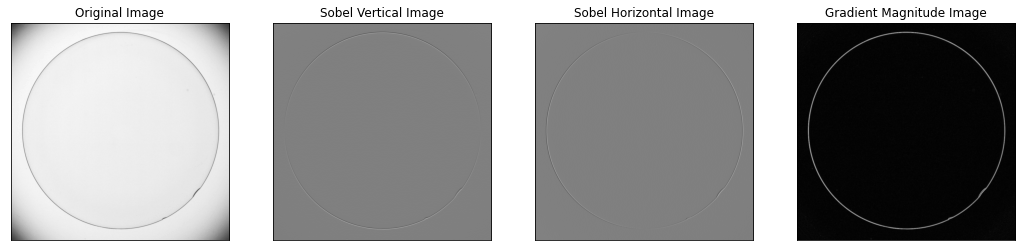

In [29]:
# Importing the image
img2 = cv.imread('Images/contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img2 is not None

# Sobel Vertical Kernel
sobel_ver = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
img_x = cv.filter2D(img2, -1, sobel_ver)

# Sobel Horizontal Kernel
sobel_hor = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
img_y = cv.filter2D(img2, -1, sobel_hor)

# Gradient Magnitude Kernel
img_grad = np.sqrt(img_x**2 + img_y**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img2, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_x, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_y, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

4. Carry out image sharpening on the graysclae version of the image shown in Fig. 3.

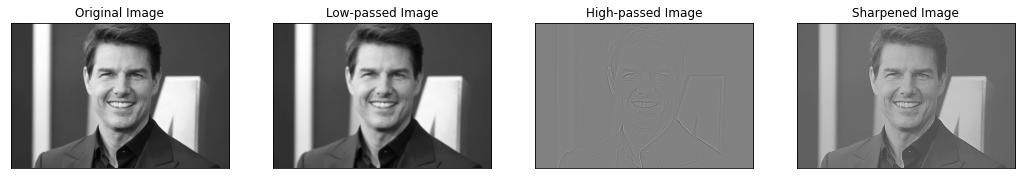

In [38]:
# Importing the image
img3 = cv.imread('Images/tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img3 is not None

# Sharpening
sigma = 2
gaussian_1d = cv.getGaussianKernel(5, sigma)
im_lp = cv.sepFilter2D(img3, -1, gaussian_1d, gaussian_1d)
im_hp = img3 - im_lp
img_sharp = cv.addWeighted(img3, 1.0, im_hp, 2.0, 0)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img3, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(im_lp, cmap = 'gray')
ax[1].set_title("Low-passed Image")
ax[2].imshow(im_hp, cmap = 'gray')
ax[2].set_title("High-passed Image")
ax[3].imshow(img_sharp, cmap = 'gray')
ax[3].set_title("Sharpened Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()